In [2]:
import pickle

path = "../data/GEOM/QM9/val_data_5k.pkl"
f = open(path,'rb')
data = pickle.load(f)
print(len(data))

25000


In [17]:
import pandas as pd

# 构建数据字典
d = {
    'atom_type': [],
    'atom_num': [],
    'boltzmannweight': [],
    'edge_index': [],
    'edge_type': [],
    'edge_num': [],
    'pos': [],
    'rdmol': [],
    'smiles': [],
    'total_energy': []
}
# 将pyg数据转化为数据字典
for ob in data:
    d['atom_type'].append(ob.atom_type)
    d['atom_num'].append(len(ob.atom_type))
    d['boltzmannweight'].append(ob.boltzmannweight)
    d['edge_index'].append(ob.edge_index)
    d['edge_type'].append(ob.edge_type)
    d['edge_num'].append(len(ob.edge_type))
    d['pos'].append(ob.pos.numpy())
    d['smiles'].append(ob.smiles)
    d['rdmol'].append(ob.rdmol)
    d['total_energy'].append(ob.totalenergy.numpy()[0])

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# 将数据字典转换为 DataFrame
qm9_data = pd.DataFrame(d)

# 查看数据集的统计摘要
print("数据摘要：")
print(qm9_data.describe())

# 查看数据集的缺失值情况
print("缺失值：")
print(qm9_data.isnull().sum())

数据摘要：
           atom_num     edge_num  total_energy
count  25000.000000  25000.00000  25000.000000
mean      19.247800     38.73488    -28.039411
std        2.703236      5.76970      1.863265
min        9.000000     14.00000    -33.830925
25%       17.000000     34.00000    -29.247682
50%       19.000000     38.00000    -28.287555
75%       21.000000     42.00000    -27.109329
max       29.000000     56.00000    -17.716461
缺失值：
atom_type          0
atom_num           0
boltzmannweight    0
edge_index         0
edge_type          0
edge_num           0
pos                0
rdmol              0
smiles             0
total_energy       0
dtype: int64


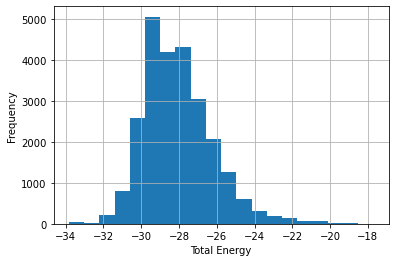

In [20]:
# 绘制数据集中总能量的直方图
qm9_data['total_energy'].hist(bins=20)
plt.xlabel('Total Energy')
plt.ylabel('Frequency')
plt.show()

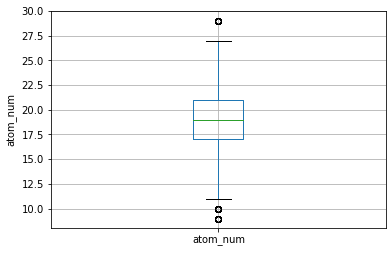

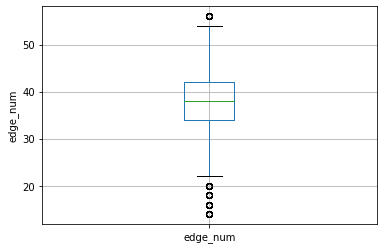

In [23]:
# 绘制数据集中原子数量的箱线图
qm9_data.boxplot(column='atom_num')
plt.ylabel('atom_num')
plt.show()

# 分子边数的箱线图
qm9_data.boxplot(column='edge_num')
plt.ylabel('edge_num')
plt.show()